### Libraries

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
# from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# from tabulate import tabulate
from sklearn.metrics import accuracy_score
# from sklearn.datasets import load_breast_cancer

In [151]:
dataset = pd.read_csv("./HousingData.csv")
dataset['Price'] = dataset.MEDV
boston_dataset = dataset.iloc[:, :13]
boston_dataset["Price"] = dataset.Price
boston_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## Dataset dictionary:

1. **CRIM**: Per capita crime rate by town.
2. **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft.
3. **INDUS**: Proportion of non-retail business acres per town.
4. **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
5. **NOX**: Nitric oxides concentration (parts per 10 million).
6. **RM**: Average number of rooms per dwelling.
7. **AGE**: Proportion of owner-occupied units built prior to 1940.
8. **DIS**: Weighted distances to five Boston employment centers.
9. **RAD**: Index of accessibility to radial highways.
10. **TAX**: Property tax rate (full-value property tax rate per 10,000 dollar).
11. **PTRATIO**: Pupil-teacher ratio by town.
12. **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of Black residents by town.
13. **LSTAT**: Percentage lower status of the population.
14. **MEDV**: Median value of owner-occupied homes in 1000s dollar (the target variable you want to predict).

Display basic information about the dataset

In [152]:
boston_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [153]:
boston_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Correlation

<img src= "./cor-examples.png">

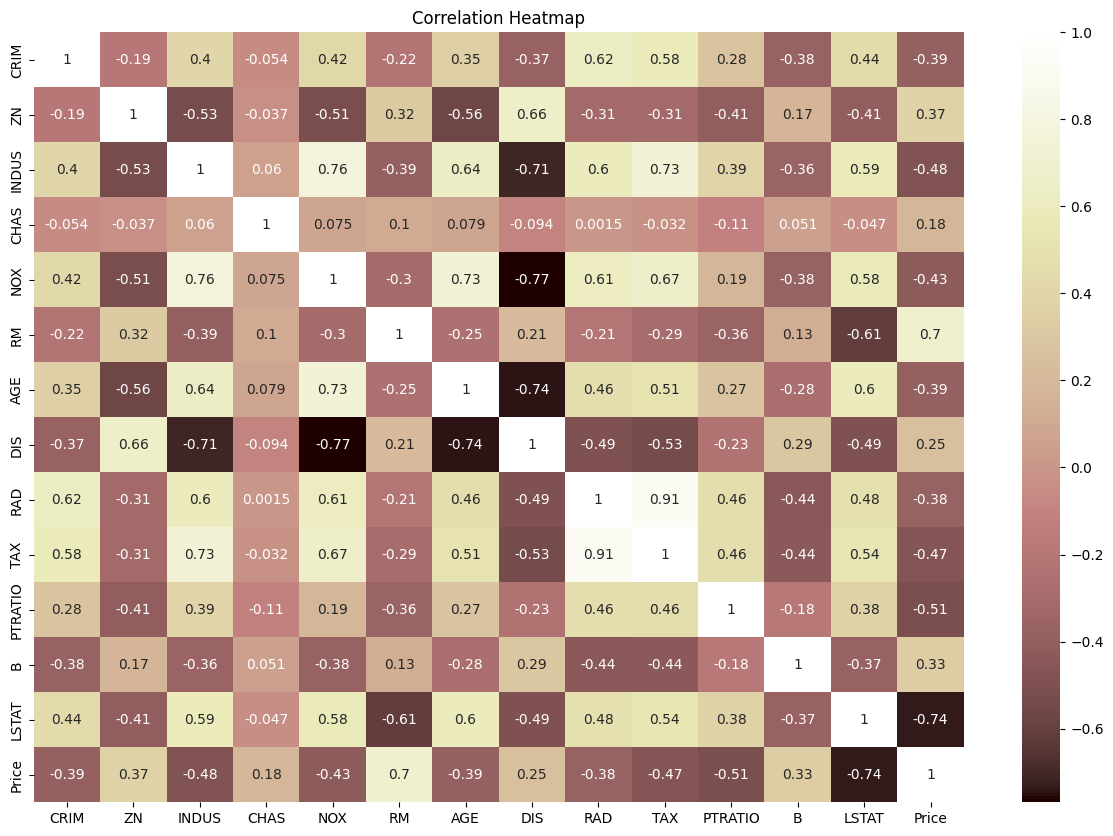

In [154]:
corr_matrix = boston_dataset.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='pink')
plt.title('Correlation Heatmap')
plt.show()

### Scatter plot

Scatter plot of selected features against the target variable(Price)

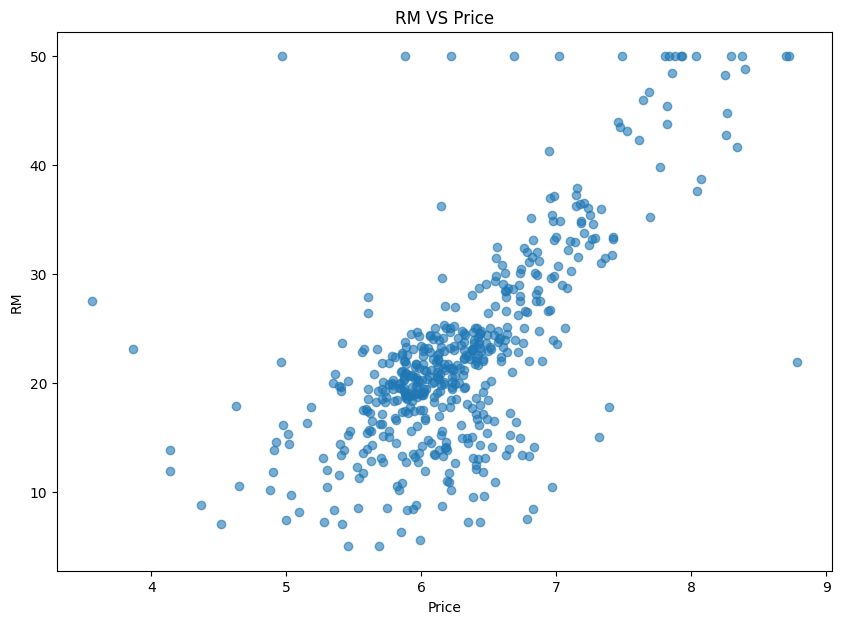

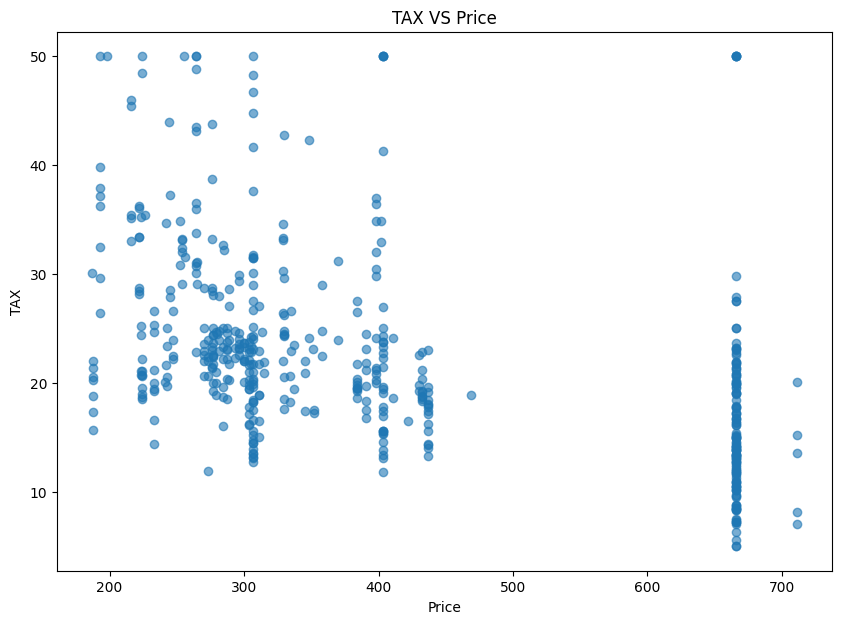

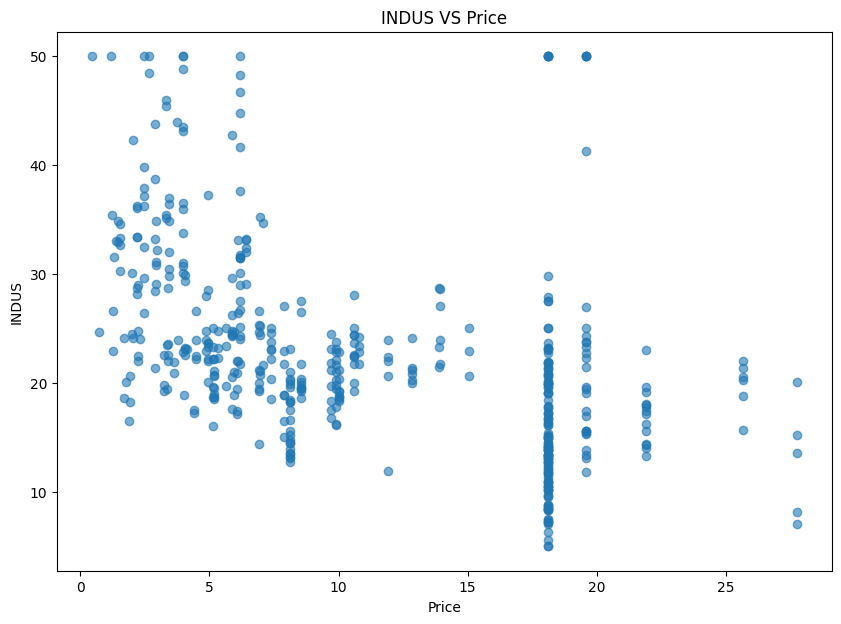

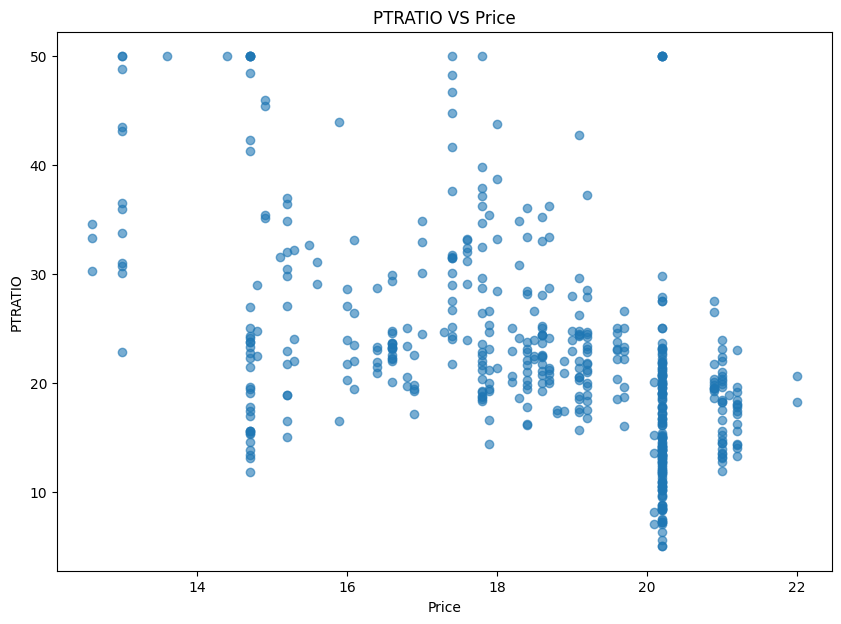

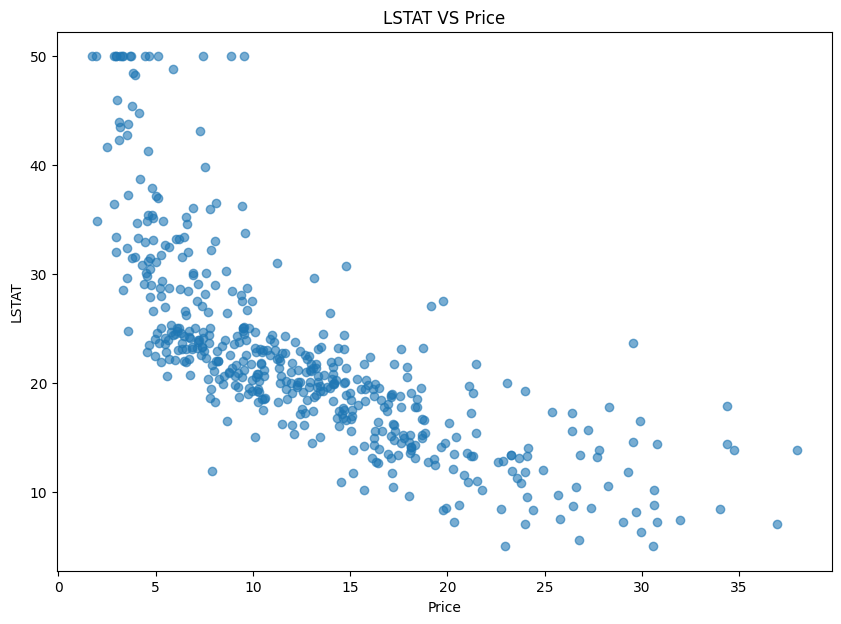

In [155]:
selected_features = ['RM', 'TAX', "INDUS",'PTRATIO', 'LSTAT']
for feature in selected_features:
    plt.figure(figsize=(10,7))
    plt.scatter(boston_dataset[feature], boston_dataset['Price'], alpha=0.6)
    plt.ylabel(feature)
    plt.xlabel("Price")
    plt.title(f"{feature} VS Price")

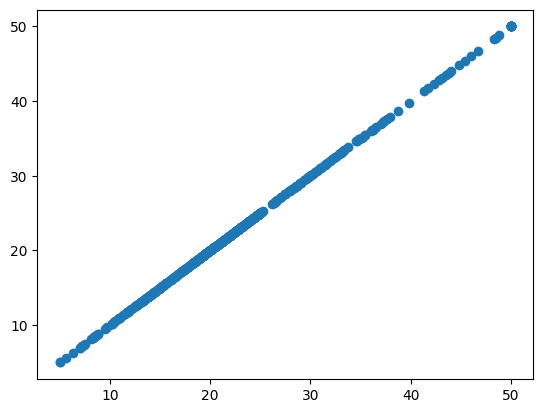

In [156]:
plt.scatter(boston_dataset["Price"], boston_dataset["Price"])

# Linear Regression

Prepare data for simple linear regression

In [157]:
boston_data_important = boston_dataset[['RM', 'TAX', 'INDUS','PTRATIO', 'LSTAT', "Price"]]
boston_data_important =boston_data_important.dropna()
target = boston_data_important["Price"]
boston_data_important, target

(        RM  TAX  INDUS  PTRATIO  LSTAT  Price
 0    6.575  296   2.31     15.3   4.98   24.0
 1    6.421  242   7.07     17.8   9.14   21.6
 2    7.185  242   7.07     17.8   4.03   34.7
 3    6.998  222   2.18     18.7   2.94   33.4
 5    6.430  222   2.18     18.7   5.21   28.7
 ..     ...  ...    ...      ...    ...    ...
 500  6.027  391   9.69     19.2  14.33   16.8
 502  6.120  273  11.93     21.0   9.08   20.6
 503  6.976  273  11.93     21.0   5.64   23.9
 504  6.794  273  11.93     21.0   6.48   22.0
 505  6.030  273  11.93     21.0   7.88   11.9
 
 [466 rows x 6 columns],
 0      24.0
 1      21.6
 2      34.7
 3      33.4
 5      28.7
        ... 
 500    16.8
 502    20.6
 503    23.9
 504    22.0
 505    11.9
 Name: Price, Length: 466, dtype: float64)

In [158]:
target

0      24.0
1      21.6
2      34.7
3      33.4
5      28.7
       ... 
500    16.8
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 466, dtype: float64

### Split

split data into training and testing sets

In [159]:
X_train, X_test, y_train, y_test = train_test_split(boston_data_important, target, test_size=0.2, random_state=42)

In [160]:
X_test, y_test

(        RM  TAX  INDUS  PTRATIO  LSTAT  Price
 60   5.741  284   5.13     19.7  13.15   18.7
 68   5.594  345   6.07     18.9  13.09   17.4
 34   6.096  307   8.14     21.0  20.34   13.5
 500  6.027  391   9.69     19.2  14.33   16.8
 78   6.232  398  12.83     18.7  12.34   21.2
 ..     ...  ...    ...      ...    ...    ...
 347  6.516  351   4.15     17.9   6.36   23.1
 357  6.395  666  18.10     20.2  13.27   21.7
 399  5.852  666  18.10     20.2  29.97    6.3
 239  6.606  300   4.93     16.6   7.37   23.3
 153  5.709  403  19.58     14.7  15.79   19.4
 
 [94 rows x 6 columns],
 60     18.7
 68     17.4
 34     13.5
 500    16.8
 78     21.2
        ... 
 347    23.1
 357    21.7
 399     6.3
 239    23.3
 153    19.4
 Name: Price, Length: 94, dtype: float64)

## Simple Linear Regression Model

Create and train the simple linear regression model

In [161]:
simple_model = LinearRegression()
regr = simple_model.fit(X_train, y_train)
# X_train.TAX = X_train["TAX"].astype(float)
# X_train.to_csv("X_train.csv", encoding="utf-8")


In [162]:
regr.coef_, regr.intercept_

(array([ 3.01687374e-15,  9.71445147e-17, -3.12250226e-17, -2.86120953e-16,
        -1.18828558e-16,  1.00000000e+00]),
 -7.460698725481052e-14)

## Predict

predict on test set

In [163]:
y_pred = regr.predict(X_test)

## Evaluation

Calculate and print MEAN SQUARED ERROR

In [164]:
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
print(f"Simple Linear Regression - Mean Squared Error: {mse}")

Simple Linear Regression - Mean Squared Error: 2.1739831648670543e-28
